In [1]:
''' plot the stats (i.e., mean, std, percentile ...) of model (i.e., GFS, RTOFS) 
    wind and current to identify 
        (1) strong wind & current regimes & 
        (2) highly variable regimes '''
import numpy as np
import netCDF4 as nc
import matplotlib
import matplotlib.pyplot as plt
import datetime
import os
import sys

In [2]:
''' settings '''
year = '2023'
pathG = '/Users/chi/Documents/projects/sd-ni-wp/check_model/check_GFS/'
pathR = '/Users/chi/Documents/projects/sd-ni-wp/check_model/check_RTOFS/'
''' list & select filenames '''
fnG = []
fnR = []
timestampbaseG = datetime.datetime(2025,2,28).timestamp()
timestampbaseR = datetime.datetime(2025,3,4).timestamp()
''' Check GFS files '''
fn_all = np.sort( os.listdir(pathG) )
# print(fn_all)
for fn in fn_all:
    modified_timestamp = os.path.getmtime(pathG+fn)
    if (modified_timestamp> timestampbaseG) & ('GFS.merge.sfc.' in fn) & ('.nc' in fn):
        fnG.append(fn)
        # print('Will look at:',fn, 'that is created at',datetime.datetime.fromtimestamp(modified_timestamp))
print(fnG)
''' Check RTOFS files '''
fn_all = np.sort( os.listdir(pathR) )
# print(fn_all)
for fn in fn_all:
    modified_timestamp = os.path.getmtime(pathR+fn)
    if (modified_timestamp> timestampbaseR) & ('RTOFS.merge.surface.now.' in fn) & ('.nc' in fn):
        fnR.append(fn)
        # print('Will look at:',fn, 'that is created at',datetime.datetime.fromtimestamp(modified_timestamp))
print(fnR)

['GFS.merge.sfc.20230801-20230831.nc', 'GFS.merge.sfc.20230901-20230930.nc', 'GFS.merge.sfc.20231001-20231031.nc', 'GFS.merge.sfc.20231101-20231120.nc']
['RTOFS.merge.surface.now.20230801-20230831.nc', 'RTOFS.merge.surface.now.20230901-20230930.nc', 'RTOFS.merge.surface.now.20231001-20231031.nc', 'RTOFS.merge.surface.now.20231101-20231120.nc']


In [4]:
### load topography data
path_topo = '/Users/chi/Documents/Data/Topography/GEBCO_23_Jan_2025/'
ds_topo = nc.Dataset(path_topo+'gebco_2024_n50.0_s5.0_w-98.0_e-30.0.nc')
# print(ds_topo)
lon_topo = ds_topo.variables['lon'][:]
lat_topo = ds_topo.variables['lat'][:]
elevation = ds_topo.variables['elevation'][:]
print(lon_topo.shape, lat_topo.shape, elevation.shape )

(16320,) (10800,) (10800, 16320)


variables in file: dict_keys(['time', 'LON', 'LAT', 'UFLX_AVE', 'VFLX_AVE'])


/var/folders/kq/vqqqnf_x6vd47tpg4lf57cjr0002p5/T/ipykernel_65145/2697993938.py:34: UserWarning: The following kwargs were not used by contour: 'lw'
  plt.contour(lon_topo, lat_topo, elevation, levels=[0], lw=0.5, colors='w')


variables in file: dict_keys(['time', 'LON', 'LAT', 'UFLX_AVE', 'VFLX_AVE'])
variables in file: dict_keys(['time', 'LON', 'LAT', 'UFLX_AVE', 'VFLX_AVE'])
variables in file: dict_keys(['time', 'LON', 'LAT', 'UFLX_AVE', 'VFLX_AVE'])


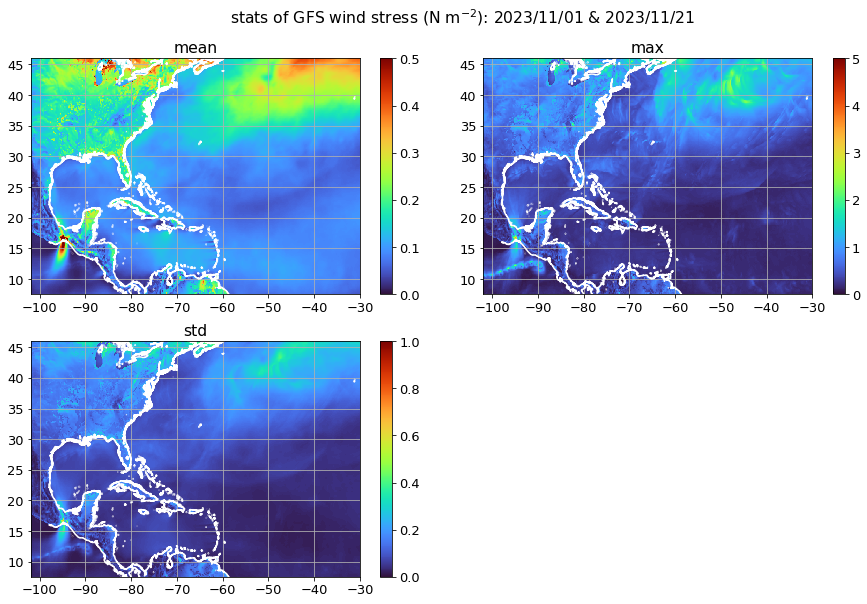

In [ ]:
''' Look at GFS data - by month '''
nrow = 2
ncol = 2
str_stats = ['mean','max','std']
varlim = [[0,0.5],[0,5],[0,1]]

for m in range( len(fnG) ):
    ds = nc.Dataset(pathG+fnG[m])
    # print(ds)
    str_vars = ds.variables.keys()
    print('variables in file:',str_vars)
    for str_var in str_vars:
        data = ds.variables[str_var][:]
        exec(str_var+'= data')
        # print(str_var, eval(str_var).shape)
    data_var = np.sqrt( np.square(UFLX_AVE) + np.square(VFLX_AVE) )
    ds.close()
    ''' compute & plot the stats on map '''
    plt.clf()
    plt.gcf().set_size_inches(15, 9)
    plt.rcParams.update({'font.size': 13})
    ''' mean '''
    plt.subplot(nrow,ncol,1)
    cs = plt.pcolormesh( LON-360, LAT, np.nanmean(data_var,axis=0),cmap='turbo',vmin=varlim[0][0],vmax=varlim[0][1] )
    ''' max '''
    plt.subplot(nrow,ncol,2)
    cs = plt.pcolormesh( LON-360, LAT, np.nanmax(data_var,axis=0),cmap='turbo',vmin=varlim[1][0],vmax=varlim[1][1] )
    ''' std '''
    plt.subplot(nrow,ncol,3)
    cs = plt.pcolormesh( LON-360, LAT, np.nanstd(data_var,axis=0),cmap='turbo',vmin=varlim[2][0],vmax=varlim[2][1] )
    for i in range( nrow*ncol-1 ):
        plt.subplot(nrow, ncol,i+1)
        plt.colorbar()
        plt.grid()
        plt.contour(lon_topo, lat_topo, elevation, levels=[0], lw=0.5, colors='w')
        if i< len(str_stats):
            plt.title(str_stats[i])
        plt.xlim([np.min(LON-360), np.max(LON-360)])
        plt.ylim([np.min(LAT), np.max(LAT)])
    ''' figure settings '''
    plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.1,hspace=0.2)
    t1str = datetime.datetime.fromtimestamp(time[0]).strftime('%Y/%m/%d')
    t2str = datetime.datetime.fromtimestamp(time[-1]).strftime('%Y/%m/%d')
    plt.suptitle('stats of GFS wind stress (N m$^{-2}$): '+t1str+' & '+t2str)
    plt.savefig('map_stats_GFS-tau_'+t1str.replace('/','')+'-'+t2str.replace('/','')+'.png',dpi=300,bbox_inches='tight')
    # break

variables in GFS.merge.sfc.20230801-20230831.nc : dict_keys(['time', 'LON', 'LAT', 'UFLX_AVE', 'VFLX_AVE'])
variables in GFS.merge.sfc.20230901-20230930.nc : dict_keys(['time', 'LON', 'LAT', 'UFLX_AVE', 'VFLX_AVE'])
variables in GFS.merge.sfc.20231001-20231031.nc : dict_keys(['time', 'LON', 'LAT', 'UFLX_AVE', 'VFLX_AVE'])


/var/folders/kq/vqqqnf_x6vd47tpg4lf57cjr0002p5/T/ipykernel_65145/624012759.py:44: UserWarning: The following kwargs were not used by contour: 'lw'
  plt.contour(lon_topo, lat_topo, elevation, levels=[0], lw=0.5, colors='w')


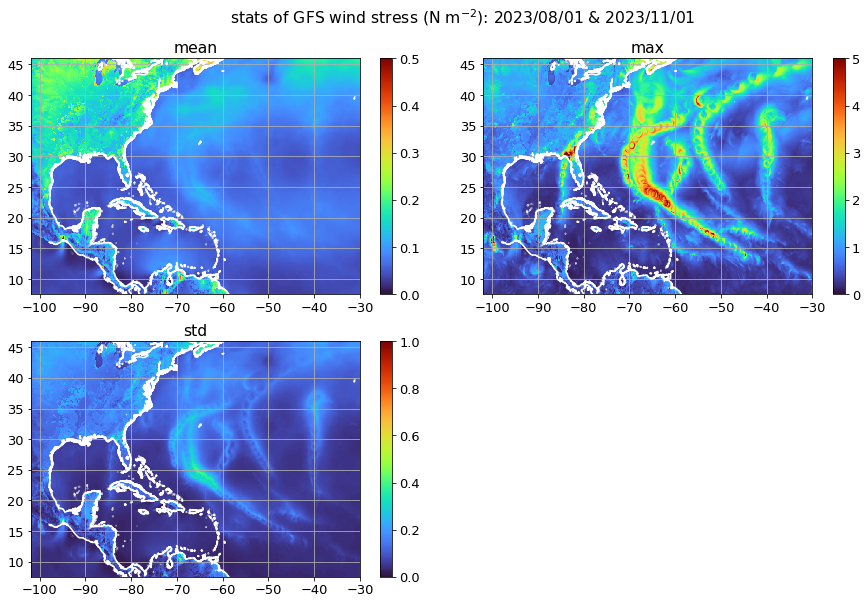

In [49]:
''' Look at GFS data - seasonal '''
nrow = 2
ncol = 2
str_stats = ['mean','max','std']
varlim = [[0,0.5],[0,5],[0,1]]
if 'data_var' in locals():
    del data_var
if 'time_var' in locals():
    del time_var
for m in range( 3):#len(fnG) ):
    ds = nc.Dataset(pathG+fnG[m])
    # print(ds)
    str_vars = ds.variables.keys()
    print('variables in',fnG[m],':',str_vars)
    for str_var in str_vars:
        data = ds.variables[str_var][:]
        exec(str_var+'= data')
        # print(str_var, eval(str_var).shape)
    if 'data_var' in locals():
        temp = np.sqrt( np.square(UFLX_AVE) + np.square(VFLX_AVE) )
        data_var = np.concatenate((data_var,temp),axis=0)
        time_var = np.append(time_var, time)
    else:
        data_var = np.sqrt( np.square(UFLX_AVE) + np.square(VFLX_AVE) )
        time_var = time
    ds.close()
''' compute & plot the stats on map '''
plt.clf()
plt.gcf().set_size_inches(15, 9)
plt.rcParams.update({'font.size': 13})
''' mean '''
plt.subplot(nrow,ncol,1)
cs = plt.pcolormesh( LON-360, LAT, np.nanmean(data_var,axis=0),cmap='turbo',vmin=varlim[0][0],vmax=varlim[0][1] )
''' max '''
plt.subplot(nrow,ncol,2)
cs = plt.pcolormesh( LON-360, LAT, np.nanmax(data_var,axis=0),cmap='turbo',vmin=varlim[1][0],vmax=varlim[1][1] )
''' std '''
plt.subplot(nrow,ncol,3)
cs = plt.pcolormesh( LON-360, LAT, np.nanstd(data_var,axis=0),cmap='turbo',vmin=varlim[2][0],vmax=varlim[2][1] )
for i in range( nrow*ncol-1 ):
    plt.subplot(nrow, ncol,i+1)
    plt.colorbar()
    plt.grid()
    plt.contour(lon_topo, lat_topo, elevation, levels=[0], lw=0.5, colors='w')
    if i< len(str_stats):
        plt.title(str_stats[i])
    plt.xlim([np.min(LON-360), np.max(LON-360)])
    plt.ylim([np.min(LAT), np.max(LAT)])
''' figure settings '''
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.1,hspace=0.2)
t1str = datetime.datetime.fromtimestamp(time_var[0]).strftime('%Y/%m/%d')
t2str = datetime.datetime.fromtimestamp(time_var[-1]).strftime('%Y/%m/%d')
plt.suptitle('stats of GFS wind stress (N m$^{-2}$): '+t1str+' & '+t2str)
plt.savefig('map_stats_GFS-tau_'+t1str.replace('/','')+'-'+t2str.replace('/','')+'.png',dpi=300,bbox_inches='tight')

RTOFS.merge.surface.now.20230801-20230831.nc


/var/folders/kq/vqqqnf_x6vd47tpg4lf57cjr0002p5/T/ipykernel_65145/1678750752.py:25: RuntimeWarning: Mean of empty slice
  cs = plt.pcolormesh( LONGITUDE-360, LATITUDE, np.nanmean(data_var,axis=0),cmap='turbo',vmin=varlim[0][0],vmax=varlim[0][1] )
/var/folders/kq/vqqqnf_x6vd47tpg4lf57cjr0002p5/T/ipykernel_65145/1678750752.py:28: RuntimeWarning: All-NaN axis encountered
  cs = plt.pcolormesh( LONGITUDE-360, LATITUDE, np.nanmax(data_var,axis=0),cmap='turbo',vmin=varlim[1][0],vmax=varlim[1][1] )
/Users/chi/opt/anaconda3/envs/pycode/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/var/folders/kq/vqqqnf_x6vd47tpg4lf57cjr0002p5/T/ipykernel_65145/1678750752.py:36: UserWarning: The following kwargs were not used by contour: 'lw'
  plt.contour(lon_topo, lat_topo, elevation, levels=[0], lw=0.5, colors='w')


RTOFS.merge.surface.now.20230901-20230930.nc
RTOFS.merge.surface.now.20231001-20231031.nc
RTOFS.merge.surface.now.20231101-20231120.nc


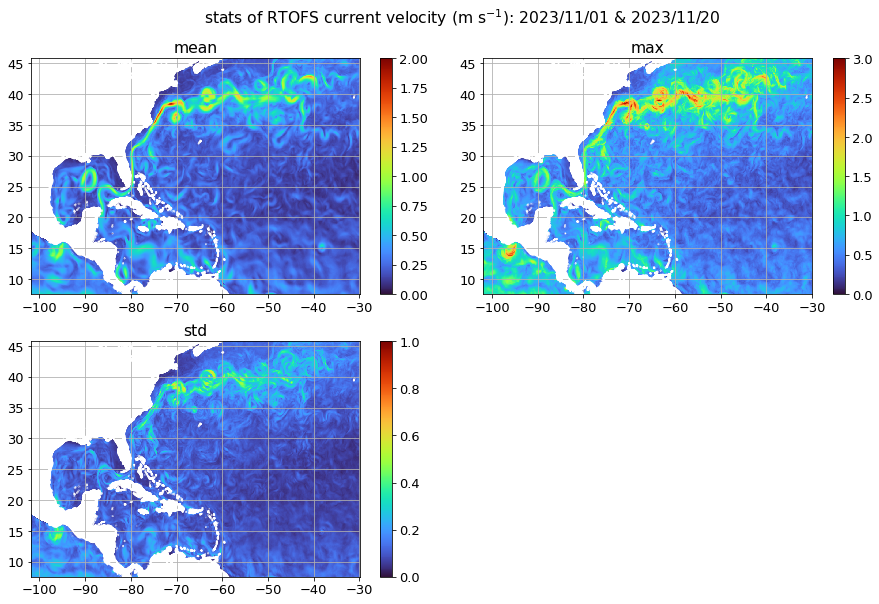

In [50]:
''' '''''' Look at RTOFS data - by month '''
nrow = 2
ncol = 2
str_stats = ['mean','max','std']
varlim = [[0,2],[0,3],[0,1]]
str_vars = ['time', 'LONGITUDE', 'LATITUDE', 'U_VELOCITY', 'V_VELOCITY']
for m in range( len(fnR) ):
    ds = nc.Dataset(pathR+fnR[m])
    print(fnR[m])
    # str_vars = ds.variables.keys()
    # print('variables in file:',str_vars)
    for str_var in str_vars:
        data = ds.variables[str_var][:]
        exec(str_var+'= data')
        # print(str_var, eval(str_var).shape)
    data_var = np.squeeze( np.sqrt( np.square(U_VELOCITY) + np.square(V_VELOCITY) ) )
    data_var[data_var> 1e20] = np.nan
    ds.close()
    ''' compute & plot the stats on map '''
    plt.clf()
    plt.gcf().set_size_inches(15, 9)
    plt.rcParams.update({'font.size': 13})
    ''' mean '''
    plt.subplot(nrow,ncol,1)
    cs = plt.pcolormesh( LONGITUDE-360, LATITUDE, np.nanmean(data_var,axis=0),cmap='turbo',vmin=varlim[0][0],vmax=varlim[0][1] )
    ''' max '''
    plt.subplot(nrow,ncol,2)
    cs = plt.pcolormesh( LONGITUDE-360, LATITUDE, np.nanmax(data_var,axis=0),cmap='turbo',vmin=varlim[1][0],vmax=varlim[1][1] )
    ''' std '''
    plt.subplot(nrow,ncol,3)
    cs = plt.pcolormesh( LONGITUDE-360, LATITUDE, np.nanstd(data_var,axis=0),cmap='turbo',vmin=varlim[2][0],vmax=varlim[2][1] )
    for i in range( nrow*ncol-1 ):
        plt.subplot(nrow, ncol,i+1)
        plt.colorbar()
        plt.grid()
        plt.contour(lon_topo, lat_topo, elevation, levels=[0], lw=0.5, colors='w')
        if i< len(str_stats):
            plt.title(str_stats[i])
        plt.xlim([np.min(LONGITUDE-360), np.max(LONGITUDE-360)])
        plt.ylim([np.min(LATITUDE), np.max(LATITUDE)])
    ''' figure settings '''
    plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.1,hspace=0.2)
    t1str = datetime.datetime.fromtimestamp(time[0]).strftime('%Y/%m/%d')
    t2str = datetime.datetime.fromtimestamp(time[-1]).strftime('%Y/%m/%d')
    plt.suptitle('stats of RTOFS current velocity (m s$^{-1}$): '+t1str+' & '+t2str)
    plt.savefig('map_stats_RTOFS-cur_'+t1str.replace('/','')+'-'+t2str.replace('/','')+'.png',dpi=300,bbox_inches='tight')
    # break

/var/folders/kq/vqqqnf_x6vd47tpg4lf57cjr0002p5/T/ipykernel_74094/334690983.py:34: RuntimeWarning: Mean of empty slice
  cs = plt.pcolormesh( LONGITUDE-360, LATITUDE, np.nanmean(data_var,axis=0),cmap='turbo',vmin=varlim[0][0],vmax=varlim[0][1] )
/var/folders/kq/vqqqnf_x6vd47tpg4lf57cjr0002p5/T/ipykernel_74094/334690983.py:37: RuntimeWarning: All-NaN axis encountered
  cs = plt.pcolormesh( LONGITUDE-360, LATITUDE, np.nanmax(data_var,axis=0),cmap='turbo',vmin=varlim[1][0],vmax=varlim[1][1] )
/var/folders/kq/vqqqnf_x6vd47tpg4lf57cjr0002p5/T/ipykernel_74094/334690983.py:45: UserWarning: The following kwargs were not used by contour: 'lw'
  plt.contour(lon_topo, lat_topo, elevation, levels=[0], lw=0.5, colors='w')


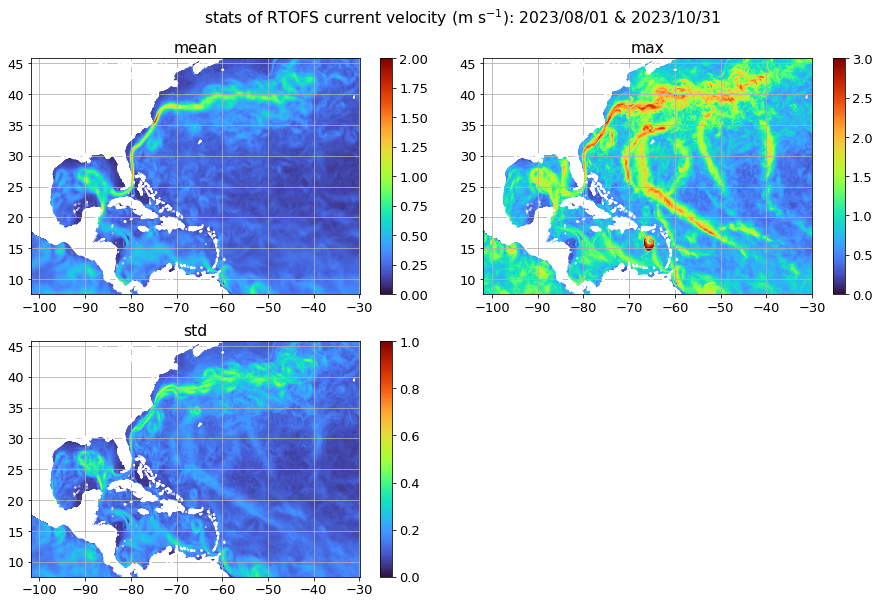

In [5]:
''' Look at RTOFS data - seasonal '''
# nrow = 2
# ncol = 2
# str_stats = ['mean','max','std']
# varlim = [[0,2],[0,3],[0,1]]
# if 'data_var' in locals():
#     del data_var
# if 'time_var' in locals():
#     del time_var
# for m in range( 3):#len(fnR) ):
#     ds = nc.Dataset(pathR+fnR[m])
#     # print(ds)
#     str_vars = ds.variables.keys()
#     print('variables in',fnR[m],':',str_vars)
#     for str_var in str_vars:
#         data = ds.variables[str_var][:]
#         exec(str_var+'= data')
#         # print(str_var, eval(str_var).shape)
#     if 'data_var' in locals():
#         temp = np.squeeze( np.sqrt( np.square(U_VELOCITY) + np.square(V_VELOCITY) ) )
#         data_var = np.concatenate((data_var,temp),axis=0)
#         time_var = np.append(time_var, time)
#     else:
#         data_var = np.squeeze( np.sqrt( np.square(U_VELOCITY) + np.square(V_VELOCITY) ) )
#         time_var = time
#     data_var[data_var> 1e20] = np.nan
#     ds.close()
''' compute & plot the stats on map '''
plt.clf()
plt.gcf().set_size_inches(15, 9)
plt.rcParams.update({'font.size': 13})
''' mean '''
plt.subplot(nrow,ncol,1)
cs = plt.pcolormesh( LONGITUDE-360, LATITUDE, np.nanmean(data_var,axis=0),cmap='turbo',vmin=varlim[0][0],vmax=varlim[0][1] )
''' max '''
plt.subplot(nrow,ncol,2)
cs = plt.pcolormesh( LONGITUDE-360, LATITUDE, np.nanmax(data_var,axis=0),cmap='turbo',vmin=varlim[1][0],vmax=varlim[1][1] )
''' std '''
plt.subplot(nrow,ncol,3)
cs = plt.pcolormesh( LONGITUDE-360, LATITUDE, np.nanstd(data_var,axis=0),cmap='turbo',vmin=varlim[2][0],vmax=varlim[2][1] )
for i in range( nrow*ncol-1 ):
    plt.subplot(nrow, ncol,i+1)
    plt.colorbar()
    plt.grid()
    plt.contour(lon_topo, lat_topo, elevation, levels=[0], lw=0.5, colors='w')
    if i< len(str_stats):
        plt.title(str_stats[i])
    plt.xlim([np.min(LONGITUDE-360), np.max(LONGITUDE-360)])
    plt.ylim([np.min(LATITUDE), np.max(LATITUDE)])
''' figure settings '''
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.1,hspace=0.2)
t1str = datetime.datetime.fromtimestamp(time_var[0]).strftime('%Y/%m/%d')
t2str = datetime.datetime.fromtimestamp(time_var[-1]).strftime('%Y/%m/%d')
plt.suptitle('stats of RTOFS current velocity (m s$^{-1}$): '+t1str+' & '+t2str)
plt.savefig('map_stats_RTOFS-cur_'+t1str.replace('/','')+'-'+t2str.replace('/','')+'.png',dpi=300,bbox_inches='tight')